## Data preprocessing for India housing prices dataset

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

Load dataset

In [2]:
df = pd.read_csv('../datasets/india_housing_prices.csv')

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


Select only bangalore

In [3]:
# Only keep rows where city is Bangalore
df = df[df['City'] == 'Bangalore']

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
11,12,Karnataka,Bangalore,Locality_462,Apartment,5,3988,465.38,0.12,2022,...,3,6,4,High,No,Yes,"Clubhouse, Pool, Playground, Gym",West,Broker,Ready_to_Move
56,57,Karnataka,Bangalore,Locality_125,Apartment,5,3276,139.64,0.04,1997,...,28,4,7,Medium,No,Yes,"Gym, Pool",West,Broker,Under_Construction
83,84,Karnataka,Bangalore,Locality_498,Independent House,4,3936,401.88,0.10,1999,...,26,3,6,High,No,Yes,"Gym, Pool, Clubhouse, Playground, Garden",West,Builder,Ready_to_Move
230,231,Karnataka,Bangalore,Locality_452,Apartment,1,999,342.81,0.34,2006,...,19,2,7,Low,Yes,No,"Clubhouse, Garden",West,Broker,Under_Construction
249,250,Karnataka,Bangalore,Locality_89,Independent House,2,1022,68.09,0.07,2009,...,16,4,3,Low,Yes,No,"Gym, Clubhouse, Pool",South,Owner,Under_Construction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4144 entries, 11 to 249981
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              4144 non-null   int64  
 1   State                           4144 non-null   object 
 2   City                            4144 non-null   object 
 3   Locality                        4144 non-null   object 
 4   Property_Type                   4144 non-null   object 
 5   BHK                             4144 non-null   int64  
 6   Size_in_SqFt                    4144 non-null   int64  
 7   Price_in_Lakhs                  4144 non-null   float64
 8   Price_per_SqFt                  4144 non-null   float64
 9   Year_Built                      4144 non-null   int64  
 10  Furnished_Status                4144 non-null   object 
 11  Floor_No                        4144 non-null   int64  
 12  Total_Floors                    4144

In [5]:
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000
mean,125418.885135,3.006274,2749.871380,258.456639,0.131429,2006.622104,15.037645,15.520029,18.377896,5.522442,5.545608
std,72570.677433,1.423895,1292.878271,141.256308,0.130030,9.838427,9.014272,8.712236,9.838427,2.861090,2.834709
min,12.000000,1.000000,501.000000,10.110000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62936.250000,2.000000,1644.000000,138.180000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125095.500000,3.000000,2747.000000,258.360000,0.090000,2007.000000,15.000000,16.000000,18.000000,6.000000,6.000000
75%,188631.000000,4.000000,3865.500000,383.725000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,249982.000000,5.000000,4999.000000,499.940000,0.940000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64


In [7]:
# Duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [8]:
# # Remove outliers
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# df = remove_outliers(df, 'Price')

In [9]:
# Check unique values in each column 
unique_values = {col: df[col].nunique() for col in df.columns}
unique_values

{'ID': 4144,
 'State': 1,
 'City': 1,
 'Locality': 500,
 'Property_Type': 3,
 'BHK': 5,
 'Size_in_SqFt': 2672,
 'Price_in_Lakhs': 3986,
 'Price_per_SqFt': 89,
 'Year_Built': 34,
 'Furnished_Status': 3,
 'Floor_No': 31,
 'Total_Floors': 30,
 'Age_of_Property': 34,
 'Nearby_Schools': 10,
 'Nearby_Hospitals': 10,
 'Public_Transport_Accessibility': 3,
 'Parking_Space': 2,
 'Security': 2,
 'Amenities': 324,
 'Facing': 4,
 'Owner_Type': 3,
 'Availability_Status': 2}

In [10]:
# If unique values less than 5, also give what they are
for col, count in unique_values.items():
    if count < 5:
        print(f"{col} has {count} unique values: {df[col].unique()}")

State has 1 unique values: ['Karnataka']
City has 1 unique values: ['Bangalore']
Property_Type has 3 unique values: ['Apartment' 'Independent House' 'Villa']
Furnished_Status has 3 unique values: ['Furnished' 'Semi-furnished' 'Unfurnished']
Public_Transport_Accessibility has 3 unique values: ['High' 'Medium' 'Low']
Parking_Space has 2 unique values: ['No' 'Yes']
Security has 2 unique values: ['Yes' 'No']
Facing has 4 unique values: ['West' 'South' 'North' 'East']
Owner_Type has 3 unique values: ['Broker' 'Builder' 'Owner']
Availability_Status has 2 unique values: ['Ready_to_Move' 'Under_Construction']


#### Encoding variables - property type, furnished status, public transport accessibility, parking space, security, facing, owner type, availability status

Label Encoding for ordinal variables

In [11]:
furnished_mapping = {'Unfurnished': 0, 'Semi-furnished': 0.5, 'Furnished': 1}
df['Furnished_Status_encoded'] = df['Furnished_Status'].map(furnished_mapping)

In [12]:
transport_mapping = {'Low': 0, 'Medium': 0.5, 'High': 1}
df['Public_Transport_Accessibility_encoded'] = df['Public_Transport_Accessibility'].map(transport_mapping)

Binary encoding for binary variables

In [13]:
df['Parking_Space_encoded'] = df['Parking_Space'].map({'No': 0, 'Yes': 1})

In [14]:
df['Security_encoded'] = df['Security'].map({'No': 0, 'Yes': 1})

In [15]:
df['Availability_Status_encoded'] = df['Availability_Status'].map({'Ready_to_Move': 0, 'Under_Construction': 1})

In [16]:
# df with encoded variables
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Security,Amenities,Facing,Owner_Type,Availability_Status,Furnished_Status_encoded,Public_Transport_Accessibility_encoded,Parking_Space_encoded,Security_encoded,Availability_Status_encoded
11,12,Karnataka,Bangalore,Locality_462,Apartment,5,3988,465.38,0.12,2022,...,Yes,"Clubhouse, Pool, Playground, Gym",West,Broker,Ready_to_Move,1.0,1.0,0,1,0
56,57,Karnataka,Bangalore,Locality_125,Apartment,5,3276,139.64,0.04,1997,...,Yes,"Gym, Pool",West,Broker,Under_Construction,0.5,0.5,0,1,1
83,84,Karnataka,Bangalore,Locality_498,Independent House,4,3936,401.88,0.10,1999,...,Yes,"Gym, Pool, Clubhouse, Playground, Garden",West,Builder,Ready_to_Move,1.0,1.0,0,1,0
230,231,Karnataka,Bangalore,Locality_452,Apartment,1,999,342.81,0.34,2006,...,No,"Clubhouse, Garden",West,Broker,Under_Construction,0.5,0.0,1,0,1
249,250,Karnataka,Bangalore,Locality_89,Independent House,2,1022,68.09,0.07,2009,...,No,"Gym, Clubhouse, Pool",South,Owner,Under_Construction,1.0,0.0,1,0,1


Data Visualization

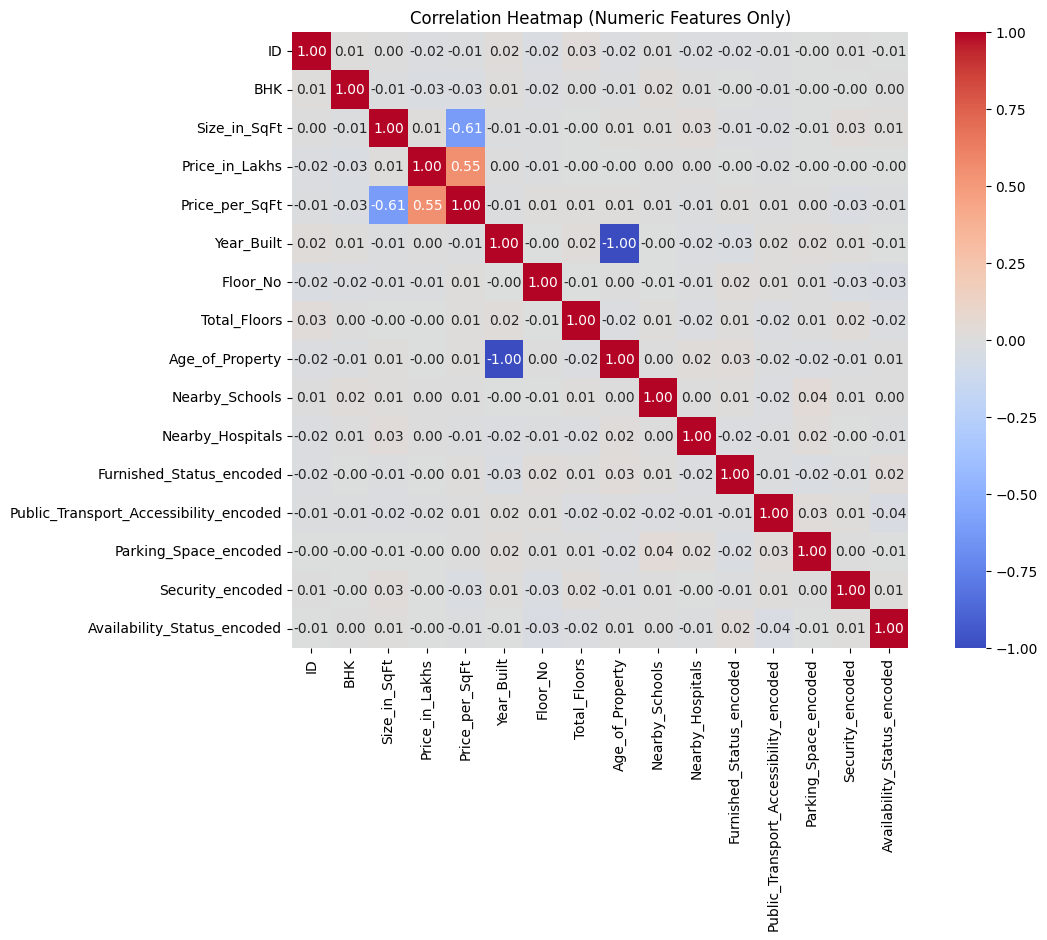

In [17]:
# Data visualization
# Correlation heatmap for numerical features
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [18]:
# Save dataset

df.to_csv('../preprocessed_data/bangalore/india_housing_prices_bangalore_cleaned.csv', index=False)